# Lab 5: Cognitive Control: The Stroop Effect & Response Conflict

Pat your head and rub your belly at the same time.  Unless you have practiced this odd exercise you will get conflict between the motor commands and quickly end up rubbing your head while also rubbing your belly, OR patting your belly while also patting your head.  As a more difficult exercise, while sitting, lift your right foot and repeatedly rotate it clockwise while simultaneously tracing a counterclockwise circle in the air with your right hand.  Contrast the difficulty of this task with a contralateral attempt, using your left foot and right hand (or right hand and left foot).  Discuss with your labmates and instructor.   Action is an obvious bottleneck -- if you see a threat and try to both "flight" and "fight" at the very same time, the results will look funny and be ineffective.  Some of our cognitive capacity limitations could be byproducts of the need to select singular coherent plans of action.  In this lab we will begin thinking about how multiple psychological processes combine and interact, and how to model what happens when signals and processing conflict.  A classic example is the Stroop task.           

## Participate in Stroop Task

Go to [TeLLab](http://lab.tellab.org/ "TeLLab"), sign in or sign up (free, no spam, <1 minute).  At the top, click "Experiments", then choose Stroop Test.  The first blue box says "Word Color Stroop, TeLLab Team" and you should click the chain-link icon at the bottom left, and then participate in the experiment (<4 minutes). 

After participating, discuss with your labmates and lab instructor.  What about the task is similar to patting your head and rubbing your belly, and what is different?  The task you participated in is a very poor experimental design with inadequate controls and no counterbalancing (but you still experience the effect of conflict, which is the main purpose) -- discuss how you would improve this experiment design.  

## Attention, Automaticity, & Control 

Each of your eyes has about 120 million light-sensitive receptors on the retina, receiving input around 10 times per second.  Between your two eyes and all your other sensory receptors (smell, taste, touch, sound), you are receiving many billions of units of stimulation every second.  Not all of this information makes it into your brain -- for example, before information exits your eye it has already been processed and compressed down to the firing output of 10 million retinal ganglion cells.  Still this is a torrent of information, and you can only be consciously aware and act upon a tiny fraction of all the incoming signals.  Attention is a collection of processing mechanisms that work together to filter, prioritize, and select a relevant subset of the incoming information.   

Psychologists and neuroscientists have extensively documented the capacity limits of human cognition, but we do not yet fully understand all the sources of capacity limits.  Change detection tasks ("spot the difference" between two images) and multiple object tracking tasks (keep track of moving targets among visually identical moving distractors) demonstrate severely limited awareness (e.g. around 1 object identity, and 3-4 object locations).  Building models can help us understand these limits.     

Cognitive processes that do not require the limited resources of attention can operate automatically.  Training over time can sometimes transfer an effortful and attention-demanding task to become automatic.  For literate and educated people, reading is one of the most highly trained activities that we perform, and it becomes automatic.  The Stroop task pits the automaticity of reading against the somewhat less trained task of naming colors.   


## <a id='table'>Table of content</a> 


#### Models 
- [1. A simplified stroop model - linear stroop](#stroop1)
- [2. Another simplified stroop model - stroop network without recurrent connection](#stroop2)
- [3. The full stroop model](#stroop3)


#### Lab exercise
- [0. The limitation of the linear stroop model](#l0)
- [1. The limitation of the linear stroop model](#l1)
- [2. Word reading, stroop model without recurrent connection](#l2)
- [3. Model the flanker task](#l3)
- [4. BUILD](#l4)


### <a id='l0'>Lab exercise 0: understand the stroop task</a> 

List 3 ways that you could improve upon the Stroop task that you participated in on TeLLab, and explain how these design changes are improvements. 

In [ ]:
# """for google colab"""
!pip install psyneulink 
!pip install stroop 

In [ ]:
import numpy as np 
import psyneulink as pnl 
import matplotlib.pyplot as plt 
import seaborn as sns 

# because google colab doesn't have the latest version of seaborn ... 
# to make sure the colors are picked intuitively... 
# ... this should be 3 if you are on google colab, 4 if you have newer version of seaborn
cb_n_colors = 3

%matplotlib inline
%autosave 5

sns.set(style='white', context='talk', palette='colorblind')
np.random.seed(0)

Autosaving every 5 seconds


## <a id='stroop1'>1. A simplified stroop model - linear stroop</a> 
[Back to top](#table)

In this section, we will study a simple linear network, without hidden units. There are two input layers correspond to color inputs and word inputs, and they map to an output layer. 

Each layer has two units, representing red and green. For example, [1, 0] for the color input layer means the stimulus has red color. [0, 1] for the word input means the word is green (but the color of the word is controled by the color input). And the activity for the output layer can be viewed as the response. For example, [.8, .1] can be thought as having stronger "red response" (than "green response"). 

**Thought question**: how might this simple network capture the phenomenon that word reading is faster than color naming? 


In [ ]:
# set the strength of the two processing pathways 
strength_color_processing = 1 
strength_word_processing  = 1.5

# input layers  
color_inp = pnl.TransferMechanism(
    default_variable=[0, 0], 
    function=pnl.Linear(slope=strength_color_processing), 
    name="Color"
)
word_inp = pnl.TransferMechanism(
    default_variable=[0, 0], 
    function=pnl.Linear(slope=strength_word_processing), 
    name="Word"
)
# output layer 
response = pnl.TransferMechanism(
    default_variable=[0, 0], 
    function=pnl.Linear(slope=1), 
    name="Response"
)

# Place mechanisms and projections in composition
linear_stroop = pnl.Composition()
linear_stroop.add_linear_processing_pathway(pathway = [color_inp, response])
linear_stroop.add_linear_processing_pathway(pathway = [word_inp, response])

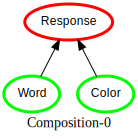

In [ ]:
linear_stroop.show_graph(output_fmt = 'jupyter')

In [ ]:
# define all stimuli 
all_conditions = ['control', 'conflict', 'congruent']
n_conditions = len(all_conditions)
red = [1, 0]
green = [0, 1]
null = [0, 0]

input_control = {color_inp: red,  word_inp: null}
input_conflict = {color_inp: red,  word_inp: green}
input_congruent = {color_inp: red,  word_inp: red}

all_stimuli = [input_control, input_conflict, input_congruent]

In [ ]:
# run the model for all conditions
responses = []
for i, stimuli in enumerate(all_stimuli): 
    response = linear_stroop.run(stimuli)
    responses.append(response)
    print(f'Condition: {all_conditions[i]} \t Response = {response}')
responses = np.squeeze(responses)

Output()

Condition: control 	 Response = [array([1., 0.])]


Output()

Condition: conflict 	 Response = [array([1. , 1.5])]


Output()

Condition: congruent 	 Response = [array([2.5, 0. ])]


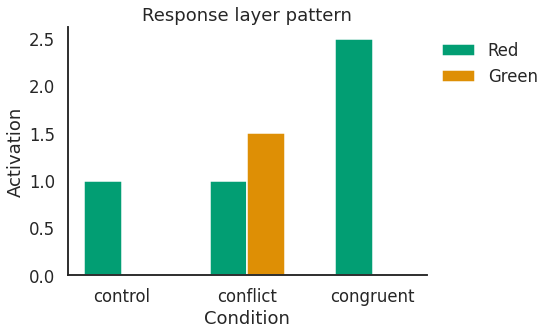

In [ ]:
# prep data for plotting
colpal = sns.color_palette('colorblind', n_colors=cb_n_colors)[-2:]
index = np.arange(n_conditions)
bar_width = 0.3

# plot
f, ax = plt.subplots(1,1,figsize=(8,5))
ax.bar(
    index, responses[:,0], 
    bar_width, color=colpal[1], label='Red'
) 
ax.bar(
    index + bar_width, responses[:,1], 
    bar_width, color=colpal[0], label='Green'
)

ax.set_xlabel('Condition')
ax.set_ylabel('Activation')
ax.set_title('Response layer pattern')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(all_conditions)
ax.legend(bbox_to_anchor=(1,1),frameon=False)
 
plt.tight_layout()
sns.despine()

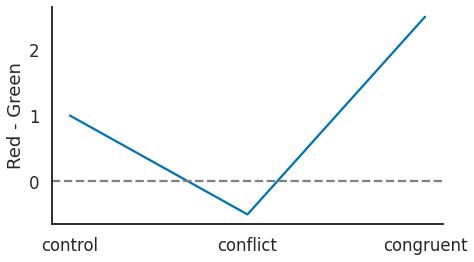

In [ ]:
f, ax = plt.subplots(1,1,figsize=(7,4))
red_green_diff = responses[:,0]-responses[:,1]
ax.plot(red_green_diff)
ax.axhline(0, color='grey',linestyle='--')
ax.set_ylabel('Red - Green')
ax.set_xticks(range(n_conditions))
ax.set_xticklabels(all_conditions)
sns.despine()

### <a id='l1'>Lab exercise 1: Limitation of this model</a> 

[Back to top](#table)

Question: This network is a drastic simplification of the full stroop model. What are some effects that cannot be captured by this simple network? 

## <a id='stroop2'>2. A stroop model without recurrent connection </a>
[Back to top](#table)


#### The model:
This is a simplification of Cohen et al. (1990) but sophisticated enough to capture some of the main findings. The values of the weights are obtained from Cohen et al. (1990). I recommend looking on the `model.show_graph()` results first, then try to understand the code that defines the model.



Differences from the 1st linear model: 
1. This network has explicit representation of the current task, by having a task input layer. [1, 0] represents the color naming task, the [0 ,1] represents the word reading task. 
2. This network has hidden representation for color and word responses. 

Difference from the full model: 
1. This network doesn't have the 
<a href="https://en.wikipedia.org/wiki/Two-alternative_forced_choice#Drift-diffusion_model">drift diffusion model</a>
on top of the output layer to perform more explicit evidence accumulation process. 

In [ ]:
def get_stroop_model():
    N_UNITS = 2
    # input layer, color and word
    inp_clr = pnl.TransferMechanism(
        size=N_UNITS, function=pnl.Linear, name='Color input'
    )
    inp_wrd = pnl.TransferMechanism(
        size=N_UNITS, function=pnl.Linear, name='Word input'
    )
    # task layer, represent the task instruction; color naming / word reading
    inp_task = pnl.TransferMechanism(
        size=N_UNITS, function=pnl.Linear, name='Task input'
    )
    # hidden layer for color and word
    hidden_func = pnl.Logistic(gain=1.0, x_0=4.0)
    hid_clr = pnl.TransferMechanism(
        size=N_UNITS, function=hidden_func, name='Color hidden'
    )
    hid_wrd = pnl.TransferMechanism(
        size=N_UNITS, function=hidden_func, name='Word hidden'
    )
    # output layer
    output = pnl.TransferMechanism(
        size=N_UNITS, function=pnl.Logistic, name='Output'
    )
    # PROJECTIONS, weights copied from cohen et al (1990)
    wts_clr_ih = pnl.MappingProjection(
        matrix=[[2.2, -2.2], [-2.2, 2.2]], name='Color input to hidden')
    wts_wrd_ih = pnl.MappingProjection(
        matrix=[[2.6, -2.6], [-2.6, 2.6]], name='Word input to hidden')
    wts_clr_ho = pnl.MappingProjection(
        matrix=[[1.3, -1.3], [-1.3, 1.3]], name='Color hidden to Output')
    wts_wrd_ho = pnl.MappingProjection(
        matrix=[[2.5, -2.5], [-2.5, 2.5]], name='Word hidden to Output')
    wts_tc = pnl.MappingProjection(
        matrix=[[4.0, 4.0], [0, 0]], name='Color naming')
    wts_tw = pnl.MappingProjection(
        matrix=[[0, 0], [4.0, 4.0]], name='Word reading')
    # build the model
    model = pnl.Composition(name='STROOP model')
    model.add_node(inp_clr)
    model.add_node(inp_wrd)
    model.add_node(hid_clr)
    model.add_node(hid_wrd)
    model.add_node(inp_task)
    model.add_node(output)
    # pathways 
    model.add_linear_processing_pathway([inp_clr, wts_clr_ih, hid_clr])
    model.add_linear_processing_pathway([inp_wrd, wts_wrd_ih, hid_wrd])
    model.add_linear_processing_pathway([hid_clr, wts_clr_ho, output])
    model.add_linear_processing_pathway([hid_wrd, wts_wrd_ho, output])
    model.add_linear_processing_pathway([inp_task, wts_tc, hid_clr])
    model.add_linear_processing_pathway([inp_task, wts_tw, hid_wrd])
    # collect the node handles
    nodes = [inp_clr, inp_wrd, inp_task, hid_clr, hid_wrd, output]
    return model, nodes

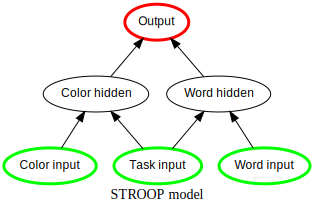

In [ ]:
# get the feed forward stroop model
ff_stroop, nodes = get_stroop_model()
[color_inp, word_inp, task_inp, _, _, _] = nodes
ff_stroop.show_graph(output_fmt = 'jupyter')

In [ ]:
# define all stimuli 
all_conditions = ['control', 'conflict', 'congruent']
n_conditions = len(all_conditions)

red = [1, 0]
green = [0, 1]
null = [0, 0]
color_naming = [1, 0]
word_reading = [0, 1]

input_control = {color_inp: red,  word_inp: null, task_inp: color_naming}
input_conflict = {color_inp: red,  word_inp: green, task_inp: color_naming}
input_congruent = {color_inp: red,  word_inp: red, task_inp: color_naming}
all_stimuli = [input_control, input_conflict, input_congruent]

In [ ]:
# run the model for all conditions
responses = []
for i, stimuli in enumerate(all_stimuli): 
    response = ff_stroop.run(stimuli)
    responses.append(response)
    print(f'Condition: {all_conditions[i]} \t Response = {response}')
responses = np.squeeze(responses)

Output()

Condition: control 	 Response = [array([0.73897516, 0.26102484])]


Output()

Condition: conflict 	 Response = [array([0.63402068, 0.36597932])]


Output()

Condition: congruent 	 Response = [array([0.82226846, 0.17773154])]


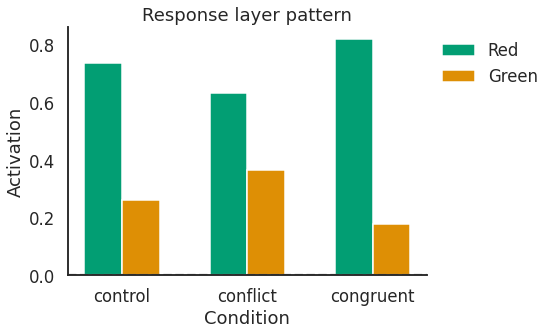

In [ ]:
# prep data for plotting
colpal = sns.color_palette('colorblind', n_colors=cb_n_colors)[-2:]
index = np.arange(n_conditions)
bar_width = 0.3

# plot
f, ax = plt.subplots(1,1,figsize=(8,5))
ax.bar(
    index, responses[:,0], 
    bar_width, color=colpal[1], label='Red'
) 
ax.bar(
    index + bar_width, responses[:,1], 
    bar_width, color=colpal[0], label='Green'
)
ax.axhline(0, color='grey',linestyle='--')

ax.set_xlabel('Condition')
ax.set_ylabel('Activation')
ax.set_title('Response layer pattern')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(all_conditions)
ax.legend(bbox_to_anchor=(1,1),frameon=False)
 
plt.tight_layout()
sns.despine()

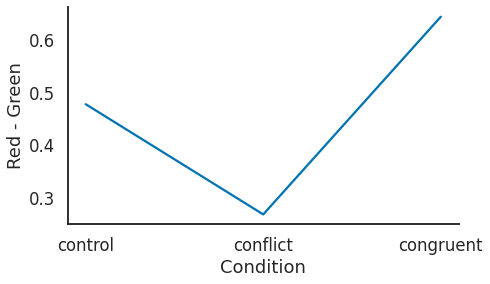

In [ ]:
f, ax = plt.subplots(1,1,figsize=(7,4))
red_green_diff_color_naming = responses[:,0]-responses[:,1]
ax.plot(red_green_diff_color_naming)
ax.set_ylabel('Red - Green')
ax.set_xlabel('Condition')
ax.set_xticks(range(n_conditions))
ax.set_xticklabels(all_conditions)
sns.despine()

### <a id='l2'>Lab exercise 2: Qualitatively replicate Figure 5 from Cohen et al. 1990</a> 

[Back to top](#table)

Here's some step-by-step suggestions: 

- 1. Run the model on the word reading task, and analyze/plot the activity patterns. Like what I did above. 
- 2. Compare the results with the color naming results above. 
- 3. Describe: how might output unit activity (of red vs. green) map to reaction time? 

Useful references: 
- Cohen, J. D., Dunbar, K., & McClelland, J. L. (1990). On the control of automatic processes: a parallel distributed processing account of the Stroop effect. Psychological Review, 97(3), 332–361.  
<a href="https://www.researchgate.net/profile/James-Mcclelland-4/publication/20956134_Cohen_JD_McClelland_JL_Dunbar_K_On_the_control_of_automatic_processes_a_parallel_distributed_processing_account_of_the_Stroop_effect_Psychol_Rev_97_332-361/links/02e7e525d7111d2cc8000000/Cohen-JD-McClelland-JL-Dunbar-K-On-the-control-of-automatic-processes-a-parallel-distributed-processing-account-of-the-Stroop-effect-Psychol-Rev-97-332-361.pdf">Link to the paper</a>



## <a id='stroop3'>3. The full stroop model </a> 

[Back to top](#table)

#### The model 

Here's a qualitative replication of the original stroop model. Compared to the previous simplification (the model without recurrence), this network has explicit mechanism (on top of the output layer) for integrating information (should I make red response or green response?) over time to make a response. This is achieved by the <a href="https://www.ncbi.nlm.nih.gov/pubmed/11488378">leaky competing accumulator</a>. And here's <a href="https://github.com/qihongl/demo-lca">a toy demo of LCA</a>. 

The important point here is that now the model has temporal dynamics, and it can be used to model reaction time very naturally. In comparison, for the previous model, we had to hypothesize the relation between output activity (of red vs. green) and reaction time. 

#### Stimuli
ps: For this lab, a former TA wrote a python library to help with constructing stroop stimuli, which is imported below. 
- You don't need to understand what it does internally but if you want to see the internal, click <a href="https://github.com/qihongl/stroop-stimuli/blob/master/stroop/stimulus.py">here</a>. 

In [ ]:
"""import a helper function for constructing stroop stimuli"""
import stroop
from stroop.stimulus import get_stimulus, TASKS, COLORS, CONDITIONS

In [ ]:
"""define the stroop model"""
N_UNITS = 2

def get_stroop_model(
    unit_noise_std = .01, dec_noise_std = .1, 
    integration_rate = .2, leak = 0, competition = 1
):
    # model params
    hidden_func = pnl.Logistic(gain=1.0, x_0=4.0)
    # input layer, color and word
    inp_clr = pnl.TransferMechanism(
        size=N_UNITS, function=pnl.Linear, name='COLOR INPUT'
    )
    inp_wrd = pnl.TransferMechanism(
        size=N_UNITS, function=pnl.Linear, name='WORD INPUT'
    )
    # task layer, represent the task instruction; color naming / word reading
    inp_task = pnl.TransferMechanism(
        size=N_UNITS, function=pnl.Linear, name='TASK'
    )
    # hidden layer for color and word
    hid_clr = pnl.TransferMechanism(
        size=N_UNITS,
        function=hidden_func,
        integrator_mode=True,
        integration_rate=integration_rate,
        noise=pnl.NormalDist(standard_deviation=unit_noise_std).function,
        name='COLORS HIDDEN'
    )
    hid_wrd = pnl.TransferMechanism(
        size=N_UNITS,
        function=hidden_func,
        integrator_mode=True,
        integration_rate=integration_rate,
        noise=pnl.NormalDist(standard_deviation=unit_noise_std).function,
        name='WORDS HIDDEN'
    )
    # output layer
    output = pnl.TransferMechanism(
        size=N_UNITS,
        function=pnl.Logistic,
        integrator_mode=True,
        integration_rate=integration_rate,
        noise=pnl.NormalDist(standard_deviation=unit_noise_std).function,
        name='OUTPUT'
    )
    # decision layer, some accumulator
    decision = pnl.LCAMechanism(
        size=N_UNITS,
        leak=leak,
        competition=competition,
        noise=pnl.UniformToNormalDist(
            standard_deviation=dec_noise_std).function,
        name='DECISION'
    )
    # PROJECTIONS, weights copied from cohen et al (1990)
    wts_clr_ih = pnl.MappingProjection(
        matrix=[[2.2, -2.2], [-2.2, 2.2]], name='COLOR INPUT TO HIDDEN')
    wts_wrd_ih = pnl.MappingProjection(
        matrix=[[2.6, -2.6], [-2.6, 2.6]], name='WORD INPUT TO HIDDEN')
    wts_clr_ho = pnl.MappingProjection(
        matrix=[[1.3, -1.3], [-1.3, 1.3]], name='COLOR HIDDEN TO OUTPUT')
    wts_wrd_ho = pnl.MappingProjection(
        matrix=[[2.5, -2.5], [-2.5, 2.5]], name='WORD HIDDEN TO OUTPUT')
    wts_tc = pnl.MappingProjection(
        matrix=[[4.0, 4.0], [0, 0]], name='COLOR NAMING')
    wts_tw = pnl.MappingProjection(
        matrix=[[0, 0], [4.0, 4.0]], name='WORD READING')
    # build the model
    model = pnl.Composition(name='STROOP model')
    model.add_node(inp_clr)
    model.add_node(inp_wrd)
    model.add_node(hid_clr)
    model.add_node(hid_wrd)
    model.add_node(inp_task)
    model.add_node(output)
    model.add_node(decision)
    model.add_linear_processing_pathway([inp_clr, wts_clr_ih, hid_clr])
    model.add_linear_processing_pathway([inp_wrd, wts_wrd_ih, hid_wrd])
    model.add_linear_processing_pathway([hid_clr, wts_clr_ho, output])
    model.add_linear_processing_pathway([hid_wrd, wts_wrd_ho, output])
    model.add_linear_processing_pathway([inp_task, wts_tc, hid_clr])
    model.add_linear_processing_pathway([inp_task, wts_tw, hid_wrd])
    model.add_linear_processing_pathway([output, pnl.IDENTITY_MATRIX, decision])
    # LOGGING
    hid_clr.set_log_conditions('value')
    hid_wrd.set_log_conditions('value')
    output.set_log_conditions('value')
    # collect the node handles
    nodes = [inp_clr, inp_wrd, inp_task, hid_clr, hid_wrd, output, decision]
    metadata = [integration_rate, dec_noise_std, unit_noise_std]
    return model, nodes, metadata


Print out some information and useful constants  

In [ ]:
# calculate experiment metadata
n_conditions = len(CONDITIONS)
n_tasks = len(TASKS)
n_colors = len(COLORS)

# constants
experiment_info = f"""
stroop experiment info
- {n_colors} colors:\t {COLORS}
- {n_colors} words:\t {COLORS}
- {n_tasks} tasks:\t {TASKS}
- {n_conditions} conditions:\t {CONDITIONS}
"""
print(experiment_info)


stroop experiment info
- 2 colors:	 ['red', 'green']
- 2 words:	 ['red', 'green']
- 2 tasks:	 ['color naming', 'word reading']
- 3 conditions:	 ['control', 'conflict', 'congruent']



In [ ]:
"""
get the stroop model
"""
model, nodes, model_metadata = get_stroop_model()
[inp_color, inp_word, inp_task, hid_color, hid_word, output, decision] = nodes
[integration_rate, dec_noise_std, unit_noise_std] = model_metadata

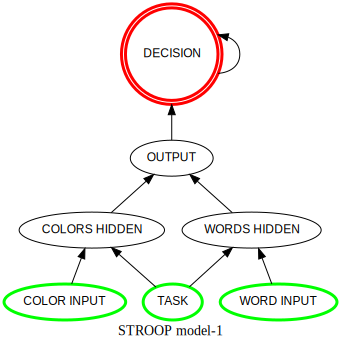

In [ ]:
model.show_graph(output_fmt = 'jupyter')

In [ ]:
"""define the inputs
i.e. all CONDITIONS x TASKS for the experiment
"""
# the length of the stimulus sequence
n_time_steps = 120

# color naming - cong
inputs_cn_con = get_stimulus(
    inp_color, 'red', inp_word, 'red', inp_task, 'color naming', n_time_steps
)
# color naming - incong
inputs_cn_cfl = get_stimulus(
    inp_color, 'red', inp_word, 'green', inp_task, 'color naming', n_time_steps
)
# color naming - control
inputs_cn_ctr = get_stimulus(
    inp_color, 'red', inp_word, None, inp_task, 'color naming', n_time_steps
)
# word reading - cong
inputs_wr_con = get_stimulus(
    inp_color, 'red', inp_word, 'red', inp_task, 'word reading', n_time_steps
)
# word reading - incong
inputs_wr_cfl = get_stimulus(
    inp_color, 'green', inp_word, 'red', inp_task, 'word reading', n_time_steps
)
# word reading - control
inputs_wr_ctr = get_stimulus(
    inp_color, None, inp_word, 'red', inp_task, 'word reading', n_time_steps
)

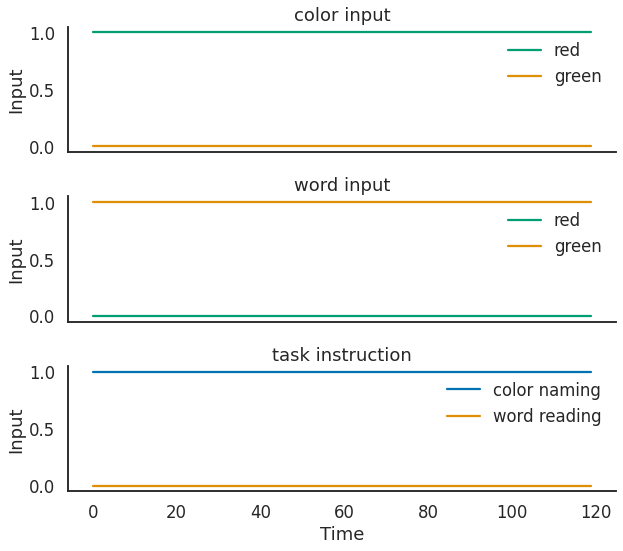

In [ ]:
"""visualize an input stimulus, note that the stimulus here is a sequence"""

# choose the condition you want to visualize 
stimuli_list_plt = inputs_cn_cfl

# set the title and the nodes to plot 
titles_plt = ['color input', 'word input', 'task instruction']
input_nodes_plt = [inp_color, inp_word]

# get some colors 
colpal = sns.color_palette('colorblind', n_colors=cb_n_colors)[-2:][::-1]

# plot the data
f, axes = plt.subplots(3,1, figsize=(9, 8),sharex=True)
for i, node_i in enumerate(input_nodes_plt):
    for j in range(n_colors):
        axes[i].plot(stimuli_list_plt[node_i][:,j],color=colpal[j])
    axes[i].legend(['red', 'green'], frameon=False)
    
axes[2].plot(stimuli_list_plt[inp_task])
axes[2].legend(['color naming', 'word reading'], frameon=False)

# mark the plot 
for i, ax in enumerate(axes): 
    ax.set_ylabel('Input')
    ax.set_title(titles_plt[i])
axes[2].set_xlabel('Time')
axes[0].legend(['red', 'green'], frameon=False)
    
f.tight_layout()
sns.despine()

**Thought question**: Create the stimuli plot *by hand* for some other task conditions. 

Let's visualize the decision activity for one trial. I'm using a color naming - conflict trial. The word green painted in red is presented, and the model has to respond the color of this stimulus (which is red). We can see that the response to red is stronger than the alternative. 

In [ ]:
# run the model on one stimulus 
inputs = inputs_cn_cfl
model.run(
    context=999,
    inputs=inputs,
    num_trials=n_time_steps,
)
activation = model.results

Output()

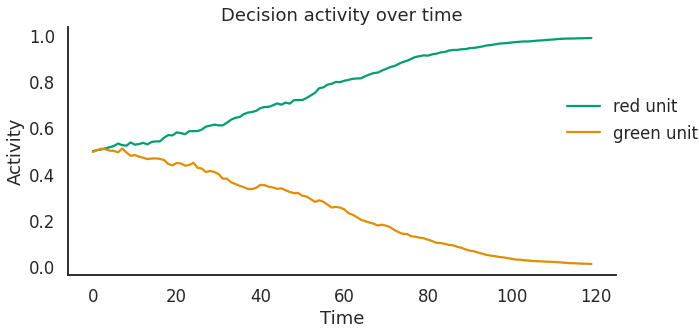

In [ ]:
colpal = sns.color_palette('colorblind', n_colors=cb_n_colors)[-2:][::-1]

f, ax = plt.subplots(1,1, figsize=(9,5))
for i in range(n_colors):
    ax.plot(np.squeeze(activation)[:,i],color=colpal[i])
    
ax.set_title('Decision activity over time')
ax.set_xlabel('Time')
ax.set_ylabel('Activity')
f.legend(['%s unit' % c for c in COLORS], frameon=False, bbox_to_anchor=(1.1,.7))
f.tight_layout()
sns.despine()

**Thought question**: What would you predict (for the activity time course) if this is a congruent trial? Run the model and plot the activity to verify your hypothesis. 

The next 2 blocks of code run the model for all tasks (color naming vs. word reading) x all conditions (control, conflict, congruent). 

In [ ]:
"""define how to run the model"""

def run_model(execution_id, n_repeats, inputs, n_time_steps=100):

    acts = np.zeros((n_repeats, n_time_steps, N_UNITS))
    for i in range(n_repeats):
        print(f'{execution_id}', end=' ')
        model.run(
            context=execution_id,
            inputs=inputs,
            num_trials=n_time_steps,
        )
        execution_id += 1
        # log acts
        acts[i, :, :] = np.squeeze(model.results)
    return acts, execution_id

In [ ]:
"""
run the model
"""


execution_id = 100
n_repeats = 1

# combine the task stimuli
cn_input_list = [inputs_cn_ctr, inputs_cn_cfl, inputs_cn_con]
wr_input_list = [inputs_wr_ctr, inputs_wr_cfl, inputs_wr_con]

# preallocate variables to hold activity
A_cn = {condition: None for condition in CONDITIONS}
A_wr = {condition: None for condition in CONDITIONS}

# run all conditions, color naming
for i, condition in enumerate(CONDITIONS):
    print(f'\nRunning color naming, condition = {condition}')
    A_cn[condition], execution_id = run_model(execution_id,
        n_repeats, cn_input_list[i]
    )
# run all conditions, word reading
for i, condition in enumerate(CONDITIONS):
    print(f'\nRunning word reading, condition = {condition}')
    print(f'Execution ids:', end=' ')
    A_wr[condition], execution_id = run_model(execution_id,
        n_repeats, wr_input_list[i]
    )
print('Done!')


Running color naming, condition = control
100 

Output()

101 

Output()

102 

Output()

103 

Output()

104 

Output()

105 

Output()

106 

Output()

107 

Output()

108 

Output()

109 

Output()


Running color naming, condition = conflict
110 

Output()

111 

Output()

112 

Output()

113 

Output()

114 

Output()

115 

Output()

116 

Output()

117 

Output()

118 

Output()

119 

Output()


Running color naming, condition = congruent
120 

Output()

121 

Output()

122 

Output()

123 

Output()

124 

Output()

125 

Output()

126 

Output()

127 

Output()

128 

Output()

129 

Output()


Running word reading, condition = control
Execution ids: 130 

Output()

131 

Output()

132 

Output()

133 

Output()

134 

Output()

135 

Output()

136 

Output()

137 

Output()

138 

Output()

139 

Output()


Running word reading, condition = conflict
Execution ids: 140 

Output()

141 

Output()

142 

Output()

143 

Output()

144 

Output()

145 

Output()

146 

Output()

147 

Output()

148 

Output()

149 

Output()


Running word reading, condition = congruent
Execution ids: 150 

Output()

151 

Output()

152 

Output()

153 

Output()

154 

Output()

155 

Output()

156 

Output()

157 

Output()

158 

Output()

159 

Output()

Done!


Compute the reaction time. 

In [ ]:
def compute_rt(act, threshold=.9):
    """compute reaction time
    take the activity of the decision layer...
    check the earliest time point when activity > threshold...
    call that RT
    *RT=np.nan if timeout
    """
    n_time_steps_, N_UNITS_ = np.shape(act)
    rts = np.full(shape=(N_UNITS_,), fill_value=np.nan)
    for i in range(N_UNITS_):
        tps_pass_threshold = np.where(act[:, i] > threshold)[0]
        if len(tps_pass_threshold) > 0:
            rts[i] = tps_pass_threshold[0]
    return np.nanmin(rts)

In [ ]:
# compute RTs for color naming and word reading
threshold = .9
RTs_cn = {condition: None for condition in CONDITIONS}
RTs_wr = {condition: None for condition in CONDITIONS}
for i, condition in enumerate(CONDITIONS):
    RTs_cn[condition] = np.array(
        [compute_rt(A_cn[condition][i, :, :], threshold) for i in range(n_repeats)]
    )
    RTs_wr[condition] = np.array(
        [compute_rt(A_wr[condition][i, :, :], threshold) for i in range(n_repeats)]
    )

# organize data for plotting, color naming and word reading
mean_rt_cn = [np.nanmean(RTs_cn[condition]) for condition in CONDITIONS]
mean_rt_wr = [np.nanmean(RTs_wr[condition]) for condition in CONDITIONS]
std_rt_cn = [np.nanstd(RTs_cn[condition]) for condition in CONDITIONS]
std_rt_wr = [np.nanstd(RTs_wr[condition]) for condition in CONDITIONS]
xtick_vals = range(len(CONDITIONS))

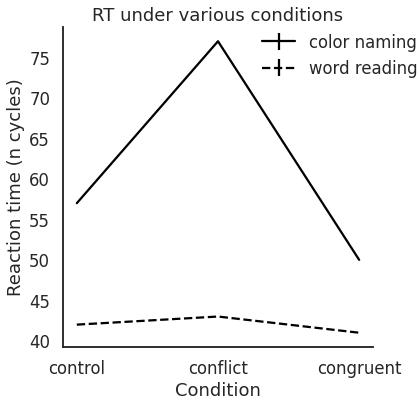

In [ ]:
# plot RT
f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.errorbar(
    x=xtick_vals, y=mean_rt_cn, yerr=std_rt_cn, 
    label='color naming', color='black'
)
ax.errorbar(
    x=xtick_vals, y=mean_rt_wr, yerr=std_rt_wr, 
    label='word reading', color='black', linestyle='--',
)
ax.set_ylabel('Reaction time (n cycles)')
ax.set_xticks(xtick_vals)
ax.set_xticklabels(CONDITIONS)
ax.set_xlabel('Condition')
ax.set_title('RT under various conditions')
f.legend(frameon=False, bbox_to_anchor=(1, .9))
f.tight_layout()
sns.despine()

### <a id='l3'>Lab exercise 3. Create a Model of Flanker Task Performance</a> 

[Back to top](#table)

There are many tasks that involve interference, and a well-studied follow up to the Stroop task is called a Flanker task.  Flanker tasks require responding to a central stimulus with task-irrelevant stimuli surrounding the central stimulus.  For example, you could be asked to respond to the central arrow on trials that contain congruent trials -> -> -> or <- <- <-,  along with incongruent trials -> <- -> or <- -> <-.  On average, most participants respond faster and more accurately on congruent trials compared to incongruent trials.  Assume these performance statistics.

Congruent RT = 400 ms
Incongruent RT = 430 ms

Your assignment is to create a model that reproduces these performance metrics on the Flanker Arrow task, hard coding the weights, and to make figures that demonstrate the performance of your model.  Be sure your model has input, hidden, and response units (both for performance and to complete #2 below).  You can use the Stroop Models as inspiration, but we recommend trying out models that are much simpler.  


### <a id='l4'>Lab exercise 4. BUILD</a> 

[Back to top](#table)